# Seaborn中文教程

## 一、变量间的关系

在这篇教程中，我们会讨论三个`seaborn`函数。我们用的最多的是`relplot()`。这是一个图形级别的函数，它用散点图和线图两种常用的手段来表现统计关系。`relplot()`使用两个坐标轴级别的函数来结合了`FacetGrid`：

- `scatterplot()`：使用`kind="scatter"`，这是默认参数
- `lineplot()`：使用`kind="line"`

通过`hue`、`size`、`style`参数，我们可以在二维图形中表现出更多的变量（除了`x`轴和`y`轴的两个，还可以通过不同的方式额外展示3个变量）。

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

### 1. 用散点图展示相关变量

在`seaborn`中，我们有数种方法可以实现散点图的绘制。最基本的一种适用于两个变量都是数值型变量的情况，它就是`scatterplot()`。在分类可视化教程中，我们会看到如何绘制分类数据的散点图。`relplot()`的类型`kind`就是`scatterplot()`。我们也可以强制指定参数`kind="scatter"`，这和不指定这一参数时效果是一样的。

In [7]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


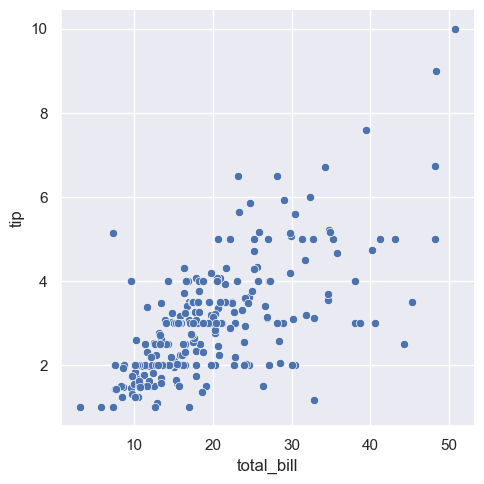

In [8]:
sns.relplot(x="total_bill", y="tip", data=tips);

当我们已经将散点绘制在二维的平面上时，我们还可以根据第三个变量来对这些点施以不同的颜色，从而引入一个新的维度。在`seaborn`中，我们用`hue`参数实现了这种想法，因为点的颜色是有意义的。

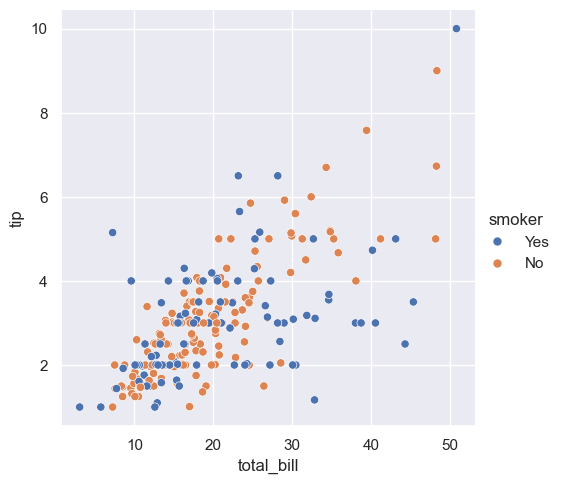

In [9]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

如果我们想要强调不同分类之间的差异，同时增加易读性，我们可以对不同的分类使用不同的标记样式：

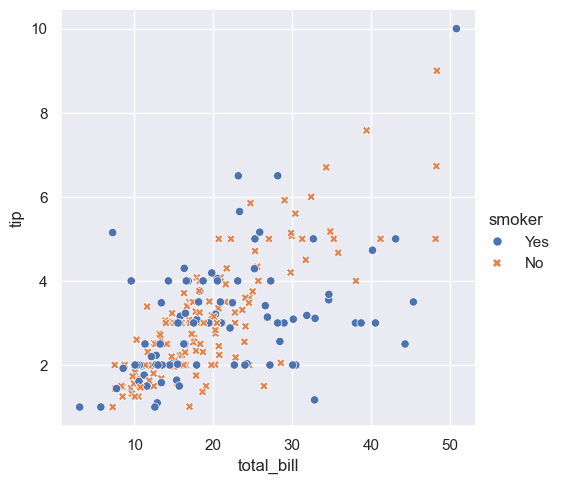

In [10]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker", data=tips);

也可以同时展示四个变量，只需要将`hue`和`style`参数单独调整到不同的分类变量即可。但是我们要谨慎使用这种方法，因为我们的眼睛对于形状的敏感性远远不如对颜色的敏感性。

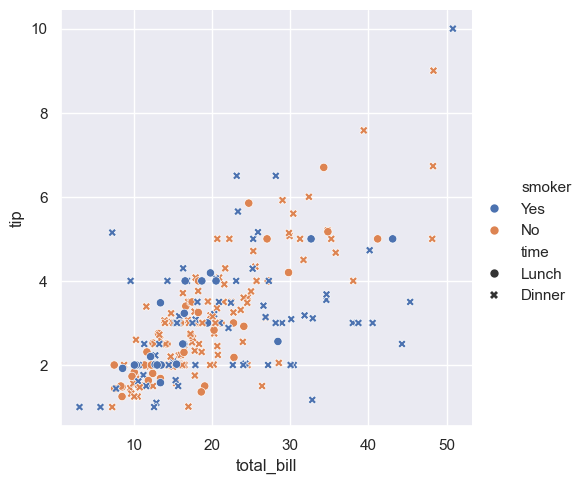

In [11]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

在上边这个例子中，`hue`参数对应的变量是分类型数据，因此`seaborn`自动为它应用了默认的定性（分类）调色板。如果`hue`参数对应的变量是数值型的（可转化为浮点数的），那么默认的颜色也会随之变为连续的定量调色板。

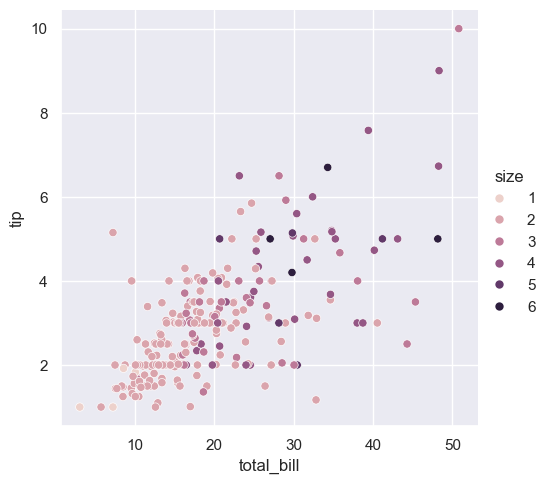

In [12]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

上述两种情况下（分类或连续数据），我们都可以自定义我们的调色板。有很多选项可以实现这一目的。下面使用`cubehelix_palette()`的字符串接口来定制我们的连续调色板：

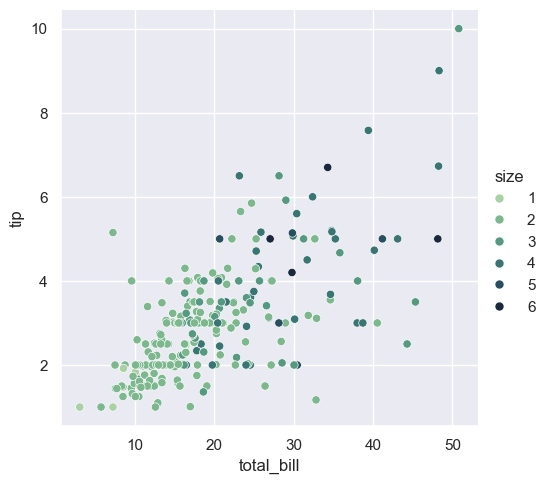

In [13]:
sns.relplot(x="total_bill", y="tip", hue="size", 
            palette="ch:r=-.5,l=.75", data=tips);

还可以使用点的大小来引入第三个额外的变量：

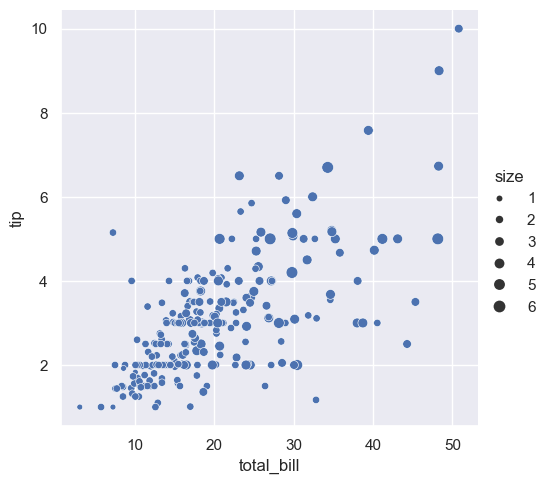

In [14]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips);

与`matplotlib.pyplot.scatter()`不同的是，这里并不是使用原始数据中的数值来为每个点选择面积大小，`seaborn`将原始数据归一化（正则化）到了某个范围，这个范围可以由我们来指定：

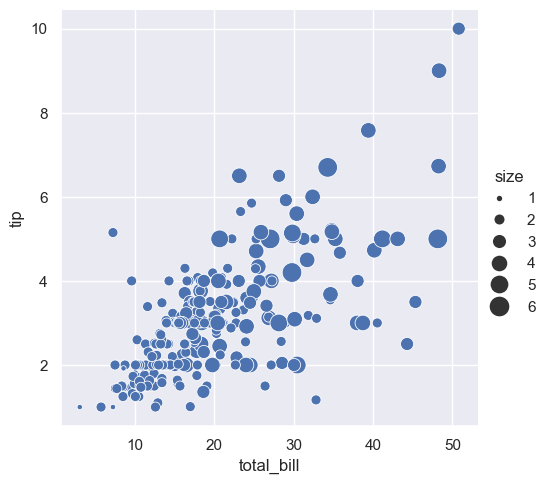

In [15]:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips);

### 2.使用线图表现连续性

在某些数据集中，我们可能想要理解某个变量随着时间的变化规律，或者想要理解某个连续型的变量。这种情况下，线图会是一个不错的选择。在`seaborn`中，我们可以通过`lineplot()`函数或者使用带有`kind="line"`参数的`relplot()`来实现线图的绘制。

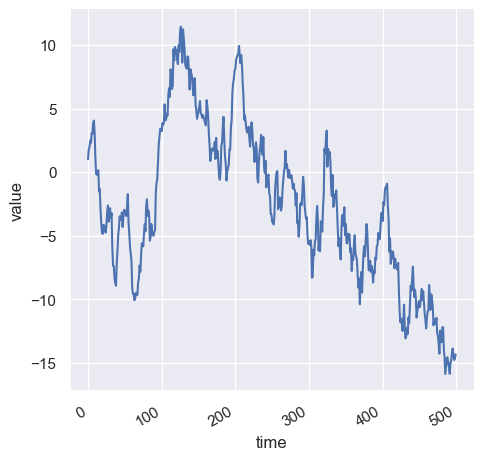

In [20]:
df = pd.DataFrame(dict(time=np.arange(500), value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

由于`lineplot()`假设用户在大多数情况下是在尝试描绘`y`相对于`x`的函数（变化规律），因此它在绘制之前会默认先对`x`做一个排序。不过我们可以**禁止**它。下面的代码生成了两组随机数，画图时强制不进行排序。

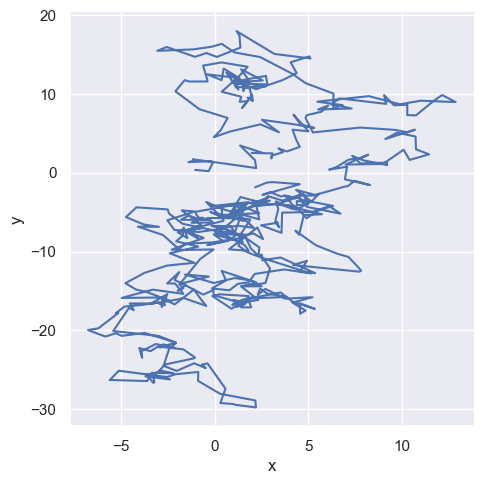

In [27]:
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
sns.relplot(x="x", y="y", sort=False, kind="line", data=df);

### 3.聚合并展示不确定性

在更多复杂的数据集中，会出现一个`x`轴变量对应了多个观测值`y`的情况。`seaborn`会默认将多个观测值聚合起来，并且将它们的均值以及95%的置信区间展示出来：

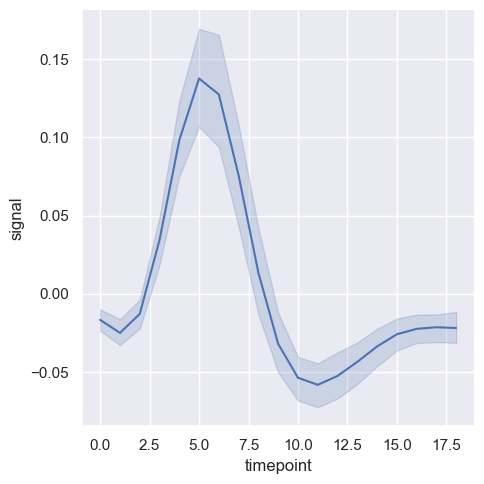

In [29]:
fmri = sns.load_dataset("fmri")
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

In [30]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
